## Introduction to Matplotlib
### Why Matplotlib?
- Built on NumPy arrays (and Python)
- Integrates directly with pandas
- Can create basic or advanced plots
- Simple to use interface (once you get the foundations)

### What are we going to cover?
- Create data
- Create plot (figure)
- Plot data (axes on figure)
- Customize plot
- Save/share plot

- Matplotlib workflow
- Importing Matplotlib and the 2 ways of plotting
- Plotting the data from NumPy arrays
- Plotting data from DataFrames

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

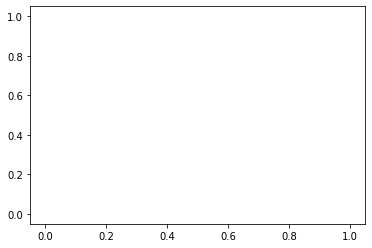

In [7]:
plt.plot();

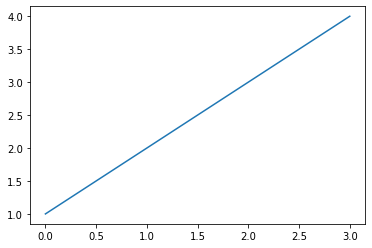

In [10]:
plt.plot([1, 2, 3, 4]);

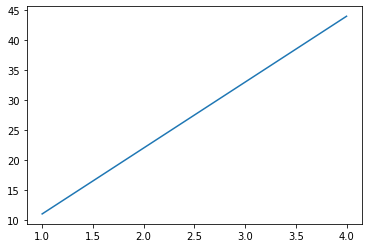

In [12]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x, y);

## 3 methods of plotting

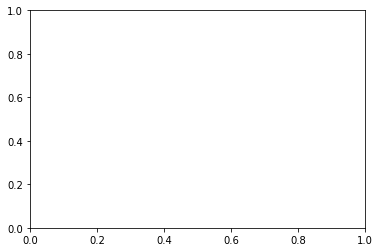

In [19]:
# 1st method of plotting
figure = plt.figure() # creates a figure
axes = figure.add_subplot() # adds some axes
plt.show()

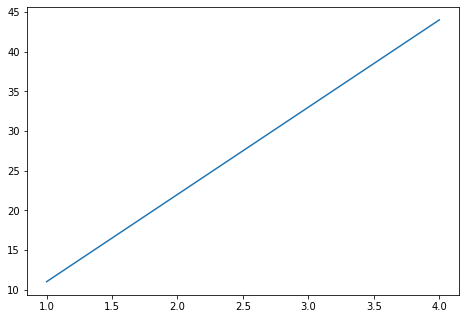

In [20]:
# 2nd method of plotting
figure = plt.figure()
axes = figure.add_axes([1, 1, 1, 1])
axes.plot(x, y) # add some data
plt.show()

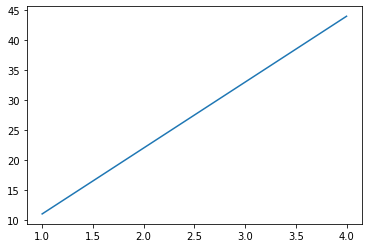

In [21]:
# 3rd method of plotting - RECOMMENDED
figure, axes = plt.subplots()
axes.plot(x, y);

<img src="images/mtp-anatomy.png" />

In [22]:
type(figure), type(axes)

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

# Matplotlib Example Workflow

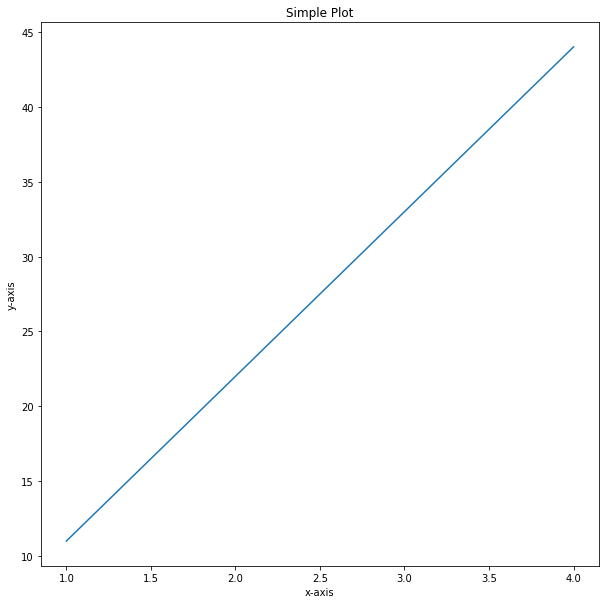

In [23]:
# 0. Import
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
figure, axes = plt.subplots(figsize=(10, 10))

# 3. Plot data
axes.plot(x, y)

# 4. Customize plot
axes.set(title="Simple Plot", xlabel="x-axis", ylabel="y-axis")

# 5. Save & Show
figure.savefig("images/sample-plot.png")

## Making figures with NumPy arrays

#### Line plot
#### Scatter plot
#### Bar plot
#### Histogram
#### Subplots

In [24]:
import numpy as np

In [25]:
# Create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

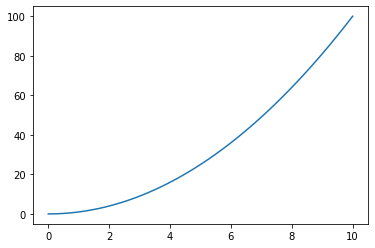

In [27]:
# Plot data and create a line plot
figure, axes = plt.subplots()
axes.plot(x, x**2);

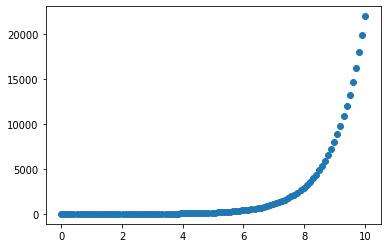

In [29]:
# Use the same data for a scatter plot
figure, axes = plt.subplots()
axes.scatter(x, np.exp(x));

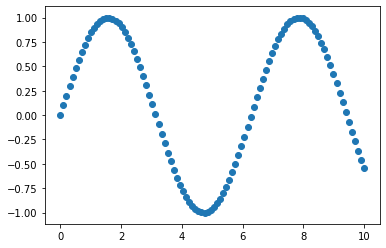

In [30]:
# Another one
figure, axes = plt.subplots()
axes.scatter(x, np.sin(x));

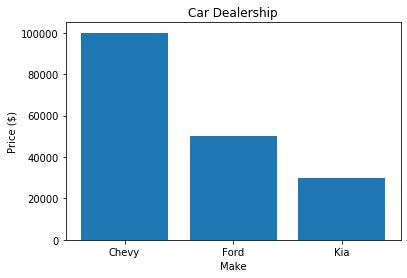

In [36]:
# Make a plot from dictionary
car_prices = {"Chevy": 100000, "Ford": 50000, "Kia": 30000}
figure, axes = plt.subplots()
axes.bar(car_prices.keys(),car_prices.values())
axes.set(title="Car Dealership", ylabel="Price ($)", xlabel="Make");

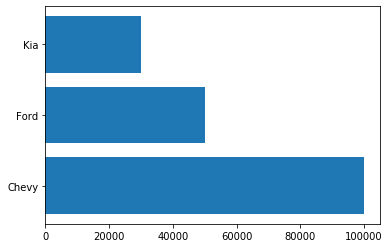

In [38]:
figure, axes = plt.subplots()
axes.barh(list(car_prices.keys()), list(car_prices.values()));

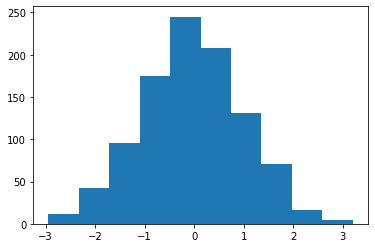

In [39]:
# Make some data
x = np.random.randn(1000)
figure, axes = plt.subplots()
axes.hist(x);

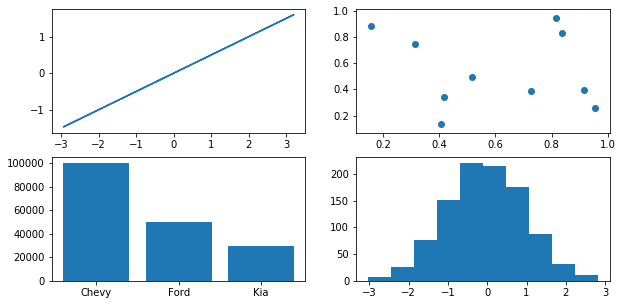

In [46]:
# Subplot option 1
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(car_prices.keys(), car_prices.values());
ax4.hist(np.random.randn(1000));

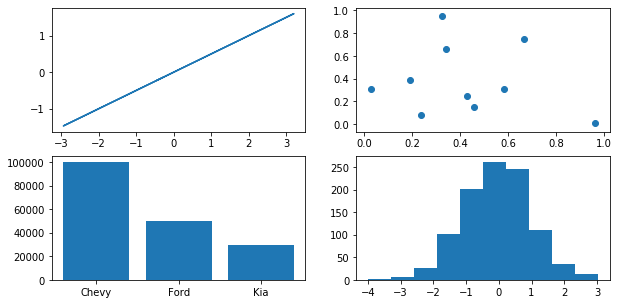

In [48]:
# Subplot option 2
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

# Plot to each different index
axes[0, 0].plot(x, x/2);
axes[0, 1].scatter(np.random.random(10), np.random.random(10));
axes[1, 0].bar(car_prices.keys(), car_prices.values());
axes[1, 1].hist(np.random.randn(1000));

## Plotting from Pandas Dataframes

In [49]:
import pandas as pd

In [50]:
# Make a dataframe
car_sales = pd.read_csv("data/car_sales.csv");

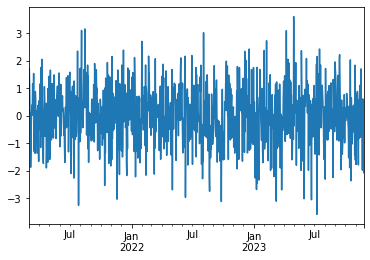

In [54]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("3/1/2021", periods=1000))
ts.cumsum()
ts.plot()

In [55]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [56]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [57]:
# Remove last two 0s
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [58]:
car_sales["Sale Date"] = pd.date_range("1/1/2021", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2021-01-01
1,Honda,Red,87899,4,5000,2021-01-02
2,Toyota,Blue,32549,3,7000,2021-01-03
3,BMW,Black,11179,5,22000,2021-01-04
4,Nissan,White,213095,4,3500,2021-01-05
5,Toyota,Green,99213,4,4500,2021-01-06
6,Honda,Blue,45698,4,7500,2021-01-07
7,Honda,Blue,54738,4,7000,2021-01-08
8,Toyota,White,60000,4,6250,2021-01-09
9,Nissan,White,31600,4,9700,2021-01-10


In [62]:
# price column was still string, so needed to convert it to int
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2021-01-01,4000
1,Honda,Red,87899,4,5000,2021-01-02,9000
2,Toyota,Blue,32549,3,7000,2021-01-03,16000
3,BMW,Black,11179,5,22000,2021-01-04,38000
4,Nissan,White,213095,4,3500,2021-01-05,41500
5,Toyota,Green,99213,4,4500,2021-01-06,46000
6,Honda,Blue,45698,4,7500,2021-01-07,53500
7,Honda,Blue,54738,4,7000,2021-01-08,60500
8,Toyota,White,60000,4,6250,2021-01-09,66750
9,Nissan,White,31600,4,9700,2021-01-10,76450


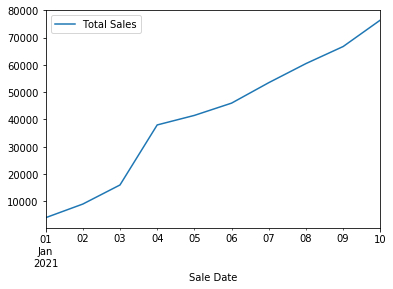

In [63]:
# Plot the total sales
car_sales.plot(x="Sale Date", y="Total Sales");

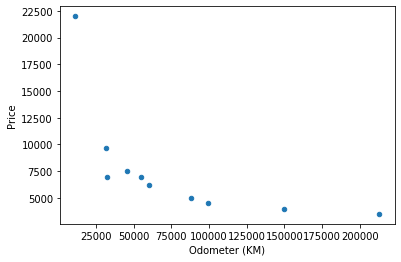

In [66]:
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [69]:
# How about a bar graph?
x = np.random.rand(10, 4)

df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.572425,0.174717,0.098613,0.113883
1,0.161085,0.955890,0.827886,0.405723
2,0.852616,0.714992,0.095929,0.299214
3,0.640744,0.624164,0.430204,0.060061
4,0.087350,0.075932,0.075631,0.730472
5,0.569385,0.448328,0.316540,0.377502
6,0.822174,0.574605,0.765681,0.419403
7,0.973970,0.254973,0.127859,0.877184
8,0.484880,0.196872,0.121481,0.790738
9,0.300232,0.343946,0.349161,0.855630


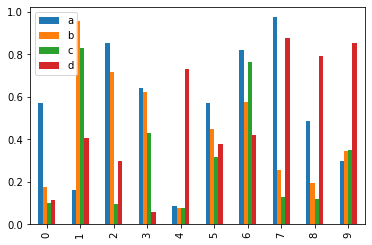

In [71]:
df.plot.bar();

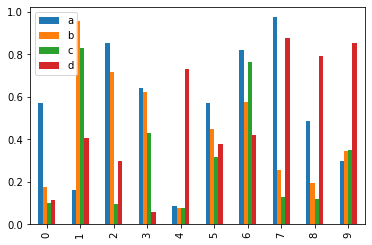

In [72]:
df.plot(kind="bar");

In [73]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2021-01-01,4000
1,Honda,Red,87899,4,5000,2021-01-02,9000
2,Toyota,Blue,32549,3,7000,2021-01-03,16000
3,BMW,Black,11179,5,22000,2021-01-04,38000
4,Nissan,White,213095,4,3500,2021-01-05,41500
5,Toyota,Green,99213,4,4500,2021-01-06,46000
6,Honda,Blue,45698,4,7500,2021-01-07,53500
7,Honda,Blue,54738,4,7000,2021-01-08,60500
8,Toyota,White,60000,4,6250,2021-01-09,66750
9,Nissan,White,31600,4,9700,2021-01-10,76450


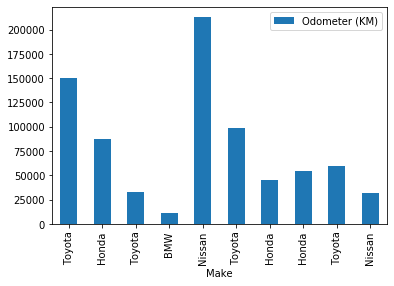

In [74]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

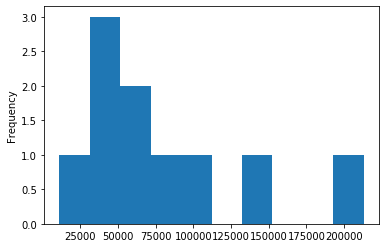

In [75]:
car_sales["Odometer (KM)"].plot.hist();

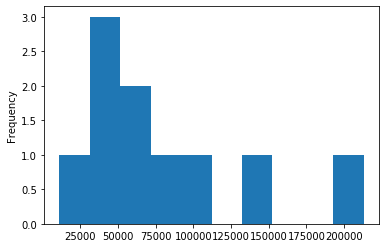

In [76]:
car_sales["Odometer (KM)"].plot(kind="hist");

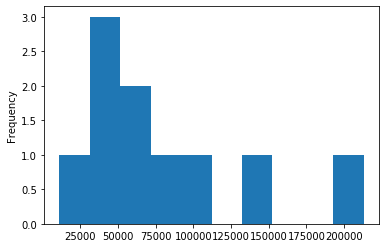

In [80]:
car_sales["Odometer (KM)"].plot.hist(bins=10);

In [82]:
# let's try on another data set
heart_disease = pd.read_csv("data/heartDisease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


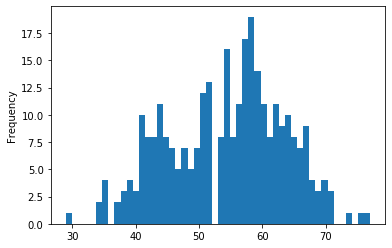

In [85]:
# Create a histogram
heart_disease["age"].plot.hist(bins=50);

In [86]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


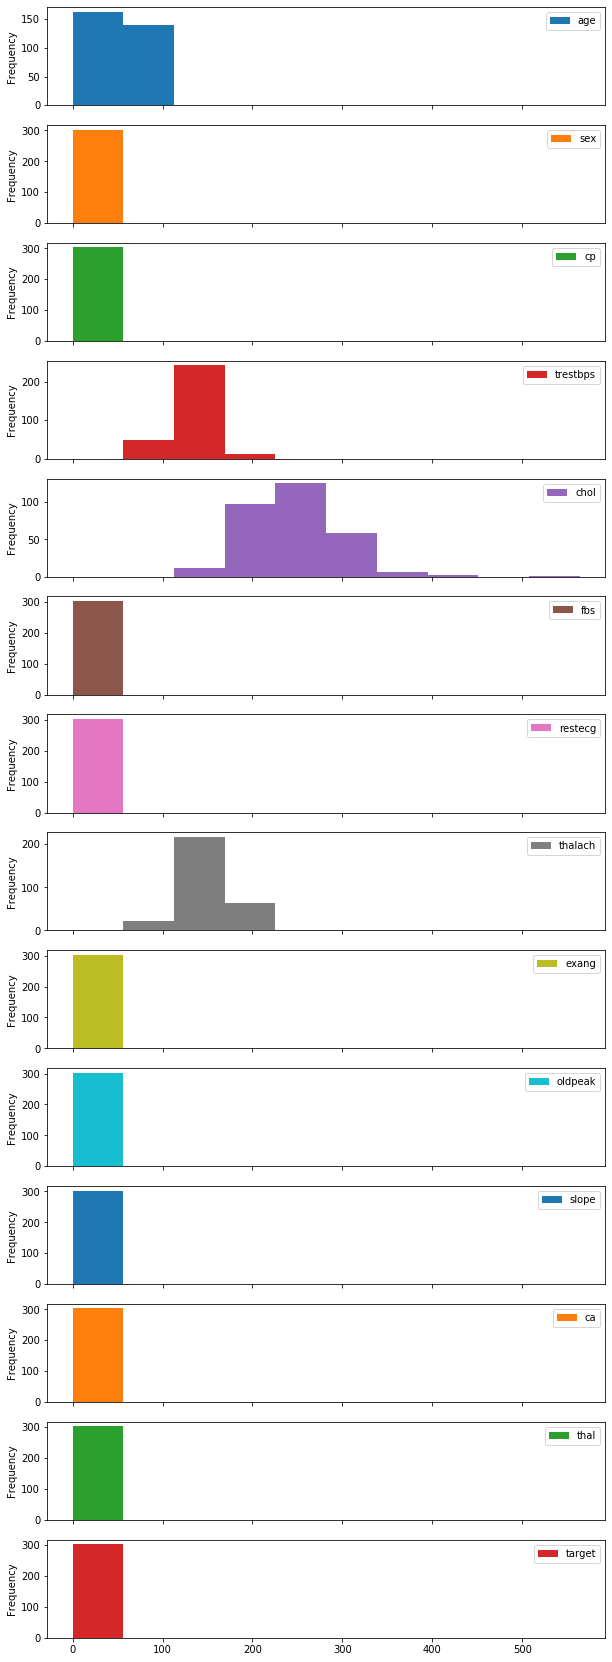

In [93]:
heart_disease.plot.hist(figsize=(10, 30), subplots=True);